In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Local
from evaluation_classes import RecordedPath, TaskPath, PathPlotter, HLCPath
from evaluation_tools import PATHTYPES

In [2]:
%matplotlib notebook

In [3]:
tp1 = TaskPath()
tp1.load_jsontask("Binyamina/Block_8_1001.json")

print(f"first coordinate in task: {tp1.get_latlon_path()[0]}")
lat_og = tp1.get_latlon_path()[0][0]
lon_og = tp1.get_latlon_path()[0][1]


TaskPath instance created
Origin coordinates defined
json task loaded | 396 waypoints loaded
first coordinate in task: [32.50947063 34.93604071]


In [9]:
hlc_path = HLCPath(path_to_csv_="task_CSVs/block8_GEO_PATH.csv", name_="hlc path name")
hlc_path.define_origin_coordinate(lat_=lat_og, lon_=lon_og)
hlc_path.set_returntype_forplot(PATHTYPES.HIGHRES_PATH)


path set with (427, 2) waypoints
HLCPath 'hlc path name' created


In [5]:
pp = PathPlotter()


PathPlotter instance created


<IPython.core.display.Javascript object>


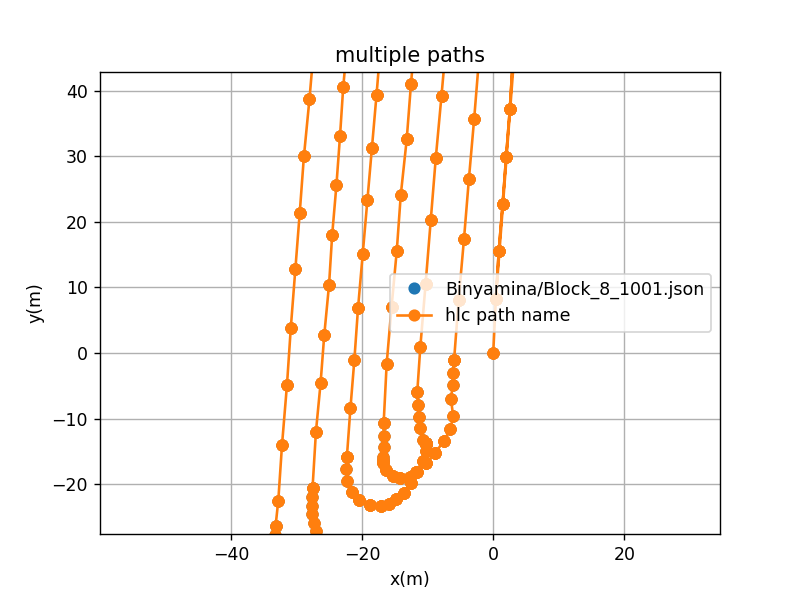

In [10]:
pp.plot_paths([tp1, hlc_path], "multiple paths")

In [7]:
rp1 = RecordedPath()
rp1.load_recording("Binyamina/10.01/block8rtk2.csv")


RecordedPath instance created
[Errno 2] No such file or directory: 'Binyamina/10.01/block8rtk2.csv'


In [8]:
# rp1.get_latlon_path_forplot()